# 1. Frame the problem

av Henrik Olsgaard


Samarbeidet med: Elisabeth Hovden

__________

I denne oppgaven har vi tatt utgangspunkt i et datasett hentet fra kaggle.com som går ut på å forutse boligpriser. Målet er å lage en modell som estimerer boligpriser utifra ulike egenskaper vi har fått oppgitt i det gitte datasettet. Vi har allerede fått oppgitt prisen de ulike husene har blitt solgt for, slik at forholdene mellom denne prisen og prisen som modellen anslår vil gi en indikasjon på hvor god modellen er. 

__________

### 1.1 Setup

Importering av ulike bibliotek som skal brukes i oppgaven

__________

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import sklearn


#Visningsinnstillinger for pandas når vi skal se visualisere dataene
#Dersom vi ikke gjør dette vil pandas kun vise deler av dataene (en kompirmert versjon)
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 100)
pd.set_option('display.width', 900)

In [2]:
seed = 42
np.random.seed(seed)

__________

### 1.2 Beskrivelse av features fra datasettet til kaggle.com

__________

-  SalePrice - the property's sale price in dollars. This is the target variable that you're trying to predict.
- MSSubClass: The building class
- MSZoning: The general zoning classification
- LotFrontage: Linear feet of street connected to property
- LotArea: Lot size in square feet
- Street: Type of road access
- Alley: Type of alley access
- LotShape: General shape of property
- LandContour: Flatness of the property
- Utilities: Type of utilities available
- LotConfig: Lot configuration
- LandSlope: Slope of property
- Neighborhood: Physical locations within Ames city limits
- Condition1: Proximity to main road or railroad
- Condition2: Proximity to main road or railroad (if a second is present)
- BldgType: Type of dwelling
- HouseStyle: Style of dwelling
- OverallQual: Overall material and finish quality
- OverallCond: Overall condition rating
- YearBuilt: Original construction date
- YearRemodAdd: Remodel date
- RoofStyle: Type of roof
- RoofMatl: Roof material
- Exterior1st: Exterior covering on house
- Exterior2nd: Exterior covering on house (if more than one material)
- MasVnrType: Masonry veneer type
- MasVnrArea: Masonry veneer area in square feet
-  ExterQual: Exterior material quality
- ExterCond: Present condition of the material on the exterior
- Foundation: Type of foundation
- BsmtQual: Height of the basement
- BsmtCond: General condition of the basement
- BsmtExposure: Walkout or garden level basement walls
- BsmtFinType1: Quality of basement finished area
- BsmtFinSF1: Type 1 finished square feet
- BsmtFinType2: Quality of second finished area (if present)
- BsmtFinSF2: Type 2 finished square feet
- BsmtUnfSF: Unfinished square feet of basement area
- TotalBsmtSF: Total square feet of basement area
- Heating: Type of heating
- HeatingQC: Heating quality and condition
- CentralAir: Central air conditioning
- Electrical: Electrical system
- 1stFlrSF: First Floor square feet
- 2ndFlrSF: Second floor square feet
- LowQualFinSF: Low quality finished square feet (all floors)
- GrLivArea: Above grade (ground) living area square feet
- BsmtFullBath: Basement full bathrooms
- BsmtHalfBath: Basement half bathrooms
- FullBath: Full bathrooms above grade
- HalfBath: Half baths above grade
- Bedroom: Number of bedrooms above basement level
- Kitchen: Number of kitchens
- KitchenQual: Kitchen quality
- TotRmsAbvGrd: Total rooms above grade (does not include bathrooms)
- Functional: Home functionality rating
- Fireplaces: Number of fireplaces
- FireplaceQu: Fireplace quality
- GarageType: Garage location
- GarageYrBlt: Year garage was built
- GarageFinish: Interior finish of the garage
- GarageCars: Size of garage in car capacity
- GarageArea: Size of garage in square feet
- GarageQual: Garage quality
- GarageCond: Garage condition
- PavedDrive: Paved driveway
- WoodDeckSF: Wood deck area in square feet
- OpenPorchSF: Open porch area in square feet
- EnclosedPorch: Enclosed porch area in square feet
- 3SsnPorch: Three season porch area in square feet
- ScreenPorch: Screen porch area in square feet
- PoolArea: Pool area in square feet
- PoolQC: Pool quality
- Fence: Fence quality
- MiscFeature: Miscellaneous feature not covered in other categories
- MiscVal: $Value of miscellaneous feature
- MoSold: Month Sold
- YrSold: Year Sold
- SaleType: Type of sale
- SaleCondition: Condition of sale


___________________________________

# 2. Datafetching

___________________________________________________________________

I denne denne delen definerer vi en metode for å hente ut dataene. 
Grunnen til at vi gjør dette som en egen metode, er for å lettere se hva som blir gjort. 
Det er viktig at vi kun bruker train.csv filen og ikke test.csv filen.


In [3]:
def load_data():
    housing_file_path = 'datasets/train.csv'
    return pd.read_csv(housing_file_path)

Lagrer filen til variabelen housing_data

In [4]:
housing_data = load_data()

______________

# 3. Data exploration



Her analyserer vi dataene som er hentet inn for å se hvordan vi skal bearbeide dem i forhold til vår model.

______________

### 3.1 Størrelse med metoden: .shape()

______________

Først tar vi en utskrift av metoden .shape() for å finne ut størrelsen på datasettet

In [5]:
print("\nNavn: Housing data \nStørrelse: {} ".format(housing_data.shape))


Navn: Housing data 
Størrelse: (1460, 81) 


Vi har altså 1460 hus, med 81 ulike egenskaper(features). 
Dette betyr nødvendigvis ikke at alle hus har alle celler med egenskaper utfylt.
Dette tar vi stilling til senere når vi skal fase ut uviktige egenskaper.

________________________________

### 3.2 Info med metoden: .info()

______________

- Vi ser videre inn i dataene til train.csv for å se hvordan de ulike egenskapene er fordelt med metoden .info()
- Kolonne 1: navn på features
- Kolonne 2: antall instanser 
- kolonne 3: datatype 
    - int64 og float64 er numeriske verdier
    - object er ulike kategorier innenfor hver enkelt feature

In [6]:
housing_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

___________________

### 3.3 Tabell med metoden: .head()

___________________

- Vi sjekker at dataen vi skal se på er riktig formatert i forhold til innstillingene vi satt i starten
- Tallet vi har i parantes angir hvor mange hus vi skal se på. Denne er 5 dersom vi ikke definerer den

In [7]:
housing_data.head(4)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000


___________________

### 3.4 Statistikk med metoden: .describe()

___________________

Denne metoden brukes for å genere forklarerende statistikk som blant annet viser sprendningen av dataen innenfor settet.  

In [8]:
housing_data.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- count : Antall instanser av hvert feature. 
    - Her er 1460 maks antall, dvs at vi feks mangler data fra noen av husene på LoTFrontage (1201/1460)
- mean: Gjennomsnittet 
    -  Gj.snittlig byggeår er 1971
- std: Normalfordeling
    
- min: Minsteverdi

- 25% / 50% / 75%: Angir grensen for hvor 25% av dataene faller inn under
    -  Under bygningsår ser vi at 25% av husene er bygget før 1954
    -  Denne dataen gir en innsikt i hvor vektingen ligger i dataene. 
    -  Siden bygningsåret øker mindre og mindre jo nærmere 100% vi kommer, sier dette oss hvor flesteparten av dataene ligger. Denne delen er en grei faktor for å luke ut data som ødelegger for majoriteten

- Max: Høyeste verdi

________________________

### 3.5.1 Histogram med metoden: .hist()

___________________

Her setter vi opp et histogram pr feature, gitt at featuren er numerisk.

-  bins: hvor mange søyler histogrammet skal deles opp i
- figsize: hvor mange pikseler hvert bilde skal ha

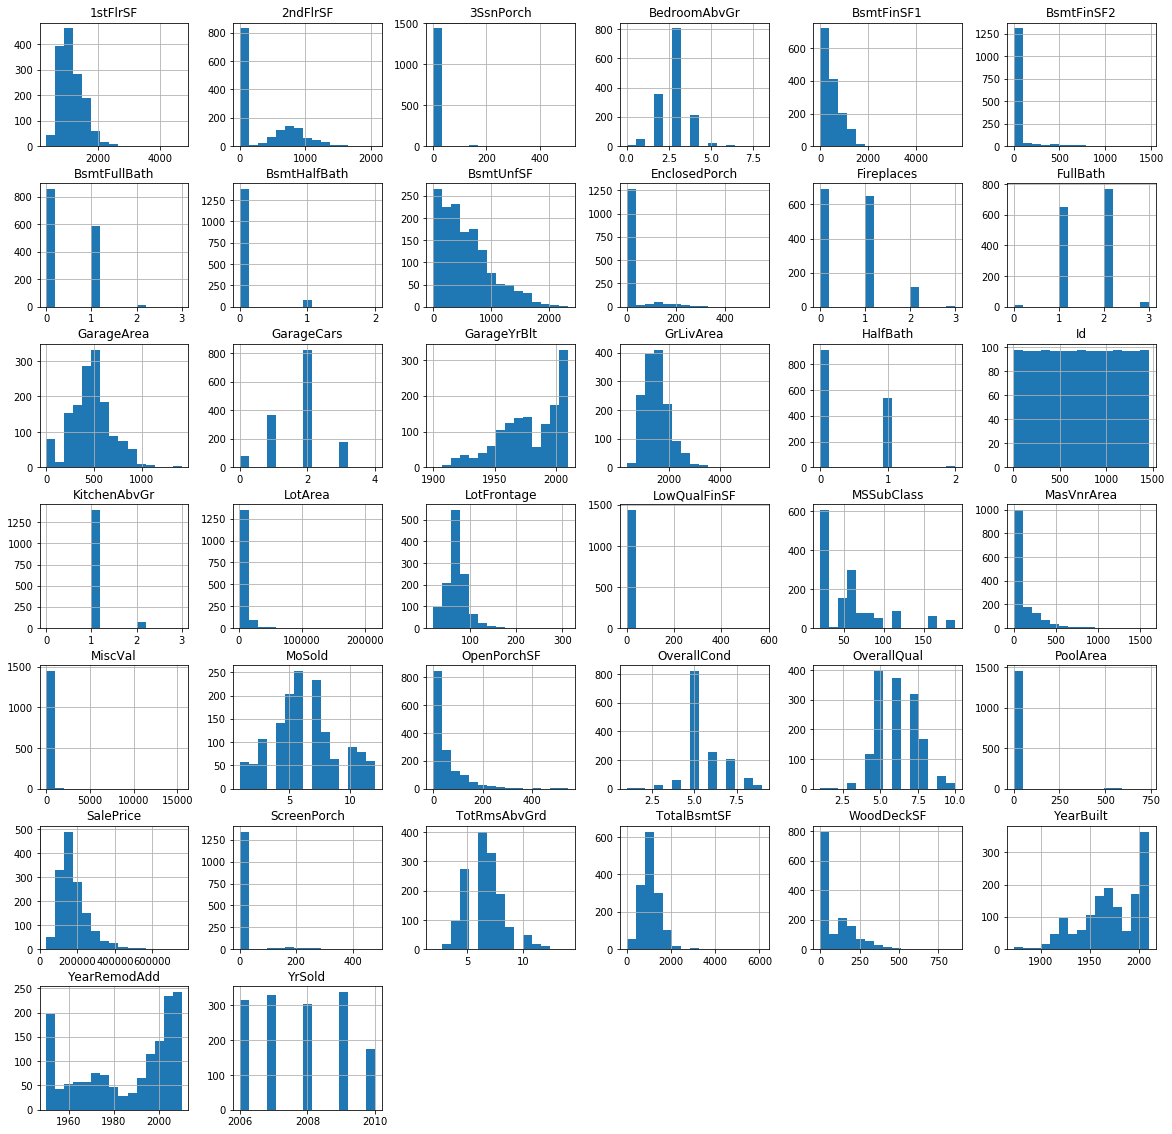

In [9]:
housing_data.hist(bins=15, figsize=(20,20))
plt.show()

En kort oppsummering av noen av egenskapene et typisk hus har, hentet fra histogrammene ovenfor:
-  90kvm dersom det kun én etasje
-  160kvm dersom to etasjer
-  svært få med vinterhage
-  minst 2 til 3 soverom
-  ca. 40% uten grad 1-Kjeller/bod (standard kjeller uten innlagt strøm)
    -  resterende 60% med liten kjeller som gradvis blir mindre fram til ca 180kvm
-  85% uten grad 2-Kjeller/bod (typisk verksted/anlegsrom som krever et tørrere miljø)
    -  resterende jevnt fordelt fram til ca 70kvm
- 60% uten bad i kjeller/bod, av resterende 40% har ca 95% ét bad
- 90% uten et lite bad i kjeller/bod
- <80kvm med uferdig kjeller/bod


_________________________________

### 3.5.2 Histogram av enkeltdata med metoden: ["navnPåData"].hist()

_________________________________

Dersom vi vil se mer detaljert på et enkelt histogram skriver vi følgende:


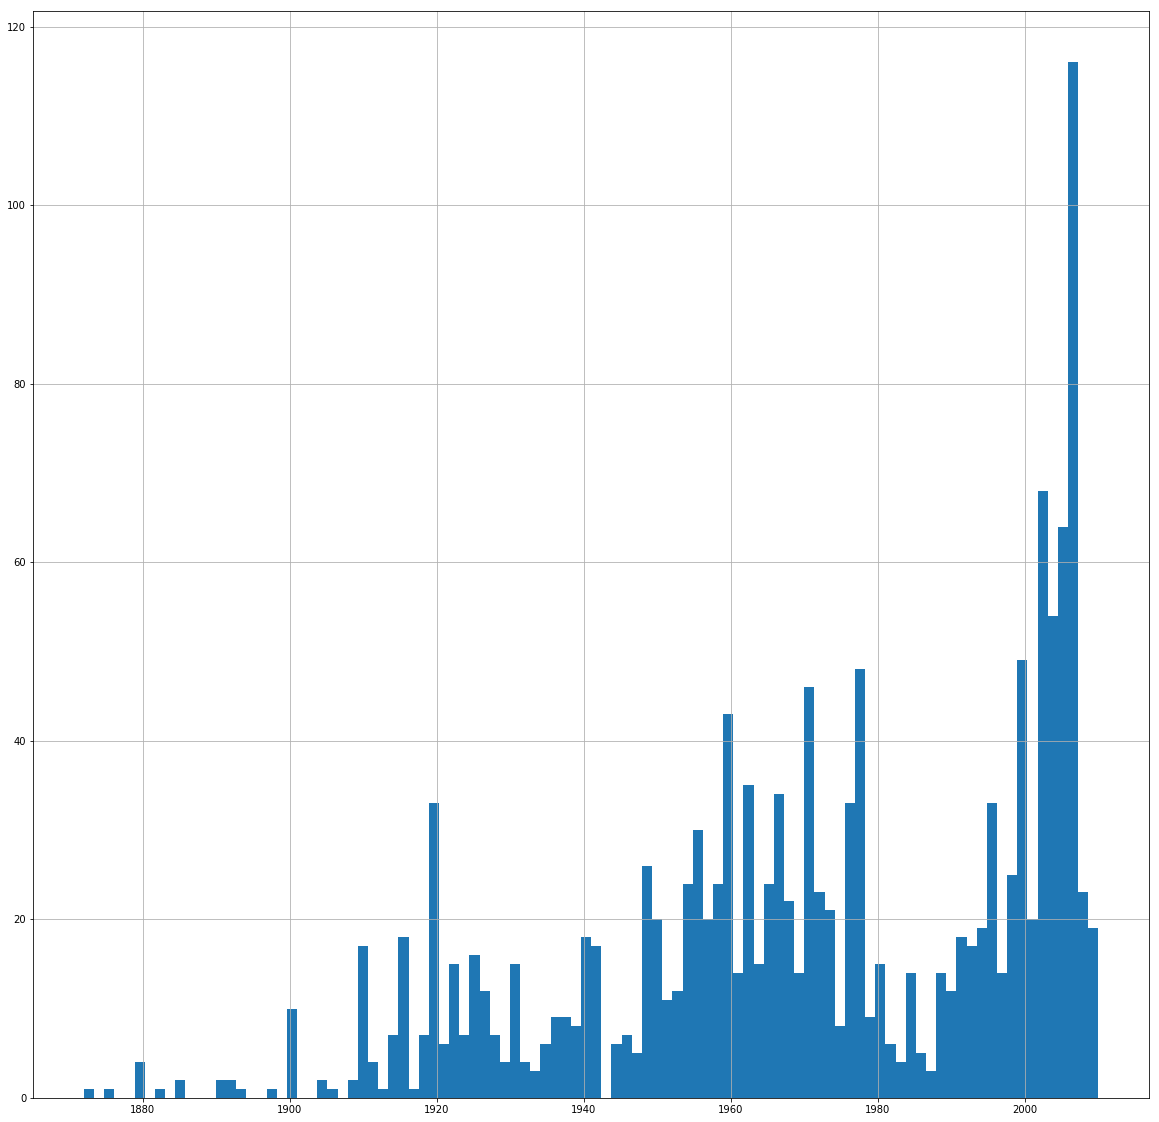

In [10]:
housing_data["YearBuilt"].hist(bins=100, figsize=(20,20))

Dersom vi ønsker histogrammet enda mer tydelig kan man dobbeltrykke på selve diagrammet

_________________________________

### 3.6.1: Korrelasjoner med metoden .corr()

_________________________________

Vi vil se om det er noen sammenheng mellom de ulike dataene. Indeksen går fra -1 til 1. Dersom denne er 0, vil denne egenskapen ikke påvirke den egenskaper vi fokuserer på. Er den 1 er den 100% utslagsgivene. Er den negativ vil verdien synke hvis hovedegenskapen øker. 

Vi starter med å lagre korrelsasjonsdataen i variabelen korrel_matrise

In [11]:
korrel_matrise = housing_data.corr()

Siden oppgaven vår handler om å forutse boligprisen for det gitte området dataene er hentet fra, vil salgsprisen være den egenskapen vi måler korrelasjonen opp mot.
Vi velger å sortere de som sykende verdier (ascending=False), slik at det blir mer oversiktlig

In [12]:
korrel_matrise["SalePrice"].sort_values(ascending=False)

SalePrice        1.000000
OverallQual      0.790982
GrLivArea        0.708624
GarageCars       0.640409
GarageArea       0.623431
TotalBsmtSF      0.613581
1stFlrSF         0.605852
FullBath         0.560664
TotRmsAbvGrd     0.533723
YearBuilt        0.522897
YearRemodAdd     0.507101
GarageYrBlt      0.486362
MasVnrArea       0.477493
Fireplaces       0.466929
BsmtFinSF1       0.386420
LotFrontage      0.351799
WoodDeckSF       0.324413
2ndFlrSF         0.319334
OpenPorchSF      0.315856
HalfBath         0.284108
LotArea          0.263843
BsmtFullBath     0.227122
BsmtUnfSF        0.214479
BedroomAbvGr     0.168213
ScreenPorch      0.111447
PoolArea         0.092404
MoSold           0.046432
3SsnPorch        0.044584
BsmtFinSF2      -0.011378
BsmtHalfBath    -0.016844
MiscVal         -0.021190
Id              -0.021917
LowQualFinSF    -0.025606
YrSold          -0.028923
OverallCond     -0.077856
MSSubClass      -0.084284
EnclosedPorch   -0.128578
KitchenAbvGr    -0.135907
Name: SalePr

-  Vi ser først at egenskapen "OverallQual" er den som påvirker boligprisen mest, tett etterfulgt av GrLivArea og GarageCars. 
-  KitchenAbvGr er den egenskapen som får boligprisen til å minke mest
-  BsmtFinSF2 er den som påvirker boligprisen minst


_______________

### 3.6.2 Korrelasjon, utvalgte egenskaper

_______________

Vi velger så ut 3 egenskaper vi vil forstørre:

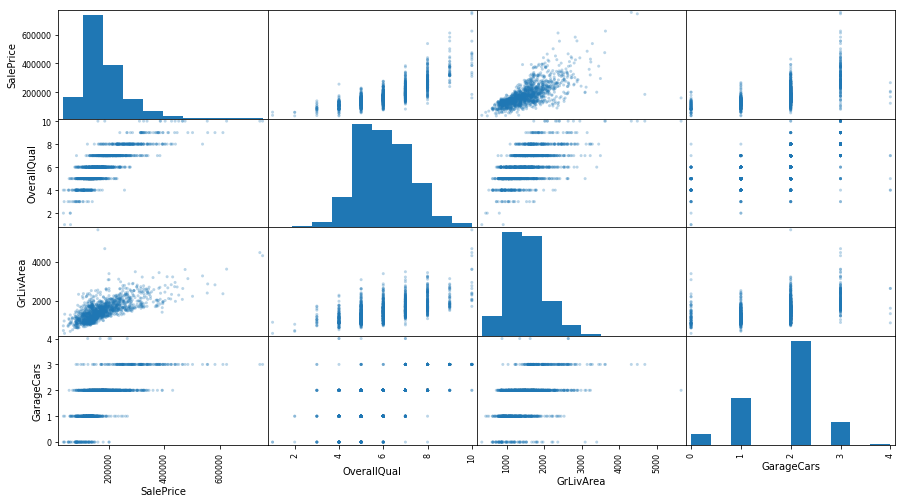

In [13]:
from pandas.plotting import scatter_matrix

attributes = ["SalePrice", "OverallQual", "GrLivArea", "GarageCars"]

scatter_matrix(housing_data[attributes], figsize=(15, 8), alpha=0.3)
plt.show()

-  ant. garasjeplasser gjør boligen dyrere, men ikke nødvendigvis
-  ant. kvm på boligen har en relativt jevn spredning
-  generel kvalitet på boligen ser vi er den som har mest tydelig korrelasjon med boligprisen

_______________

### 3.6.3: Korrelasjon, helhet med metoden .heatmap()

_______________

For å se alt i en helhet er metoden .heatmap() til seaborn grei å bruke. Her vil vi få opp korrelasjonen mellom alle egenskapene i et enkelt diagram, hvor fargekoden gjør det lett å visualisere korrelasjonsdataene. 


Kilde:  https://seaborn.pydata.org/generated/seaborn.heatmap.html

Fargene i skjemaet gir oss altså en indikasjon på om en egenskap korrelerer med en annen egenskap. Vi vet for eksempel rent intuitivt at "Id" egenskapen ikke har noen korrelasjon med noen av de andre egenskapene. Vi forventer derfor at denne har en skarp farge der den korrelerer med seg selv( verdi = 1), og forhåpentligvis en annen farge (tilnærmet = 0) i korrelasjon med de andre. 

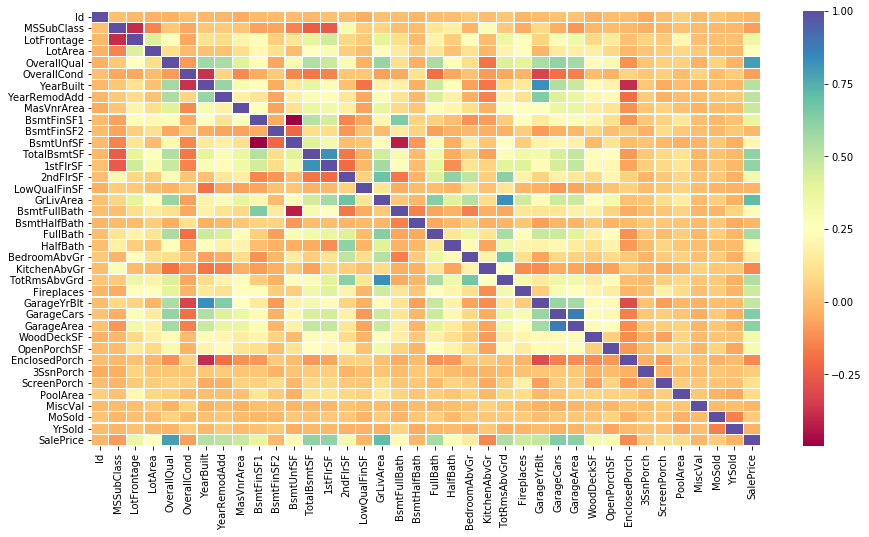

In [14]:
import seaborn as sns

corr = housing_data.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corr, annot=False, cmap='Spectral', linewidths=0.3)
plt.show()

Som vi ser stemte forventingene våre til visualiseringen av "Id" egenskapen.Vi leser av hele første rad. Blå i kryssning med seg selv, og klar oransje i de andre punktene. Vi kan utifra dette mønsteret lete fram andre "uviktige" egenskaper. Vi ser utifra dette mønsteret at følgende egenskaper kan vurderes å sløyfes fra datasettet når vi i neste punkt skal klargjøre dataene:
-  BsmtHalfBath
-  3SsnPorch
-  ScreenPorch
-  MiscVal
-  MoSold
- YrSold



_______________

# 4. Klargjøring av data:

_______________

Vi har hovedsaklig to ting vi må gjøre for å klargjøre dataene til å kunne kjøre med en MachineLearnings algoritme. 
-  4.1: Fikse på de egenskapene som mangler utfylling
- 4.2: Finne en måte å få overført de kategoriske dataene til numerisk data

_______________

### 4.1 Manglende verdier

_______________

For å løse dette problemet har vi ting vi kan gjøre:
- 4.1.1: Fjerne egenskapen helt fra alle husene.
- 4.1.2: Tildele de manglende attributtene en ny verdi. Denne kan feks være gjennomsnittet, medianen eller null. 

_______________

#### 4.1.1 Fjerne egenskaper

_______________

Det å fjerne en egenskap helt kan slå begge veier, derfor er det viktig at vi må se på hvordan denne egenskapen påvirker helheten. Er det en egenskap svært få har eller som påvirket salgsprisen lite (har en korrelasjonsVerdi nært 0) vil det i mange tilfeller være lurt å fjerne denne.

For å forvisse oss om at ikke orignal datasettet blir feilaktig, tar vi først en kopi med metoden .copy() og jobber på dette datasettet i stedet.

In [15]:
housing_data_copy1 = housing_data.copy()

Som nevnt tidligere er Id-kolonnen helt uvensentlig i forhold til data vi skal spytte inn i algoritmen senere. Vi velger derfor å ta denne ut og kjører en utskrift for å se at operasjonen gikk slik vi ønsket det. For at vi skal kunne hente denne ut senere, lagrer vi den i en egen array før vi fjernen den. 

In [16]:
housing_Id = housing_data_copy1['Id']

housing_data_copy1.drop('Id', axis = 1, inplace = True)

In [17]:
housing_data_copy1[housing_data_copy1.isnull().any(axis=1)].head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


Som vi ser er kolonnen nå tatt bort fra kopien til datasettet.

_______________

Vi ønsker nå å skaffe oss en enklest mulig oversikt over egenskapene som flest hus mangler med metoden .head(). 
-  Vi kaller derfor på metodene .isnull() for å hente ut de som har verdien "null"
-  summerer de sammen i grupper med metoden .sum()
-  for så å sortere de fra størst til minst med .sort_values().
-  Vi velger i første omgang de 10 største egenskapene med verdi=null. Dersom det er mange instanser på siste punkt øker vi, helt til vi får et lavt tall (få instanser med verdien null i egenskapen). 

In [18]:
print(housing_data_copy1.isnull().sum().sort_values(ascending=False).head(10))


PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageCond        81
GarageFinish      81
GarageQual        81
dtype: int64


-  Det første vi ser er at vi har klart å luke ut verstingene, og trenger derfor ikke å øke input i .head() metoden. 
-  Deretter ser vi at vi kan luke ut de 4 første egenskapene, siden de har så stor andel med manglende verdier. 

Vi fjerner disse på samme måte som med id tidligere fra kopien av datasettet.

In [19]:
housing_data_copy1.drop("PoolQC", axis=1, inplace=True)
housing_data_copy1.drop("MiscFeature", axis=1, inplace=True)
housing_data_copy1.drop("Alley", axis=1, inplace=True)
housing_data_copy1.drop("Fence", axis=1, inplace=True)

For å enkelt undersøke at egenskapene har blitt fjernet, bruker vi metoden len() som henter informasjon om størrelsen til arrayen og skriver denne ut til skjermen. Siden vi startet med 81, fjernet Id, og nå 4 andre egenskaper skal vi sitte igjen med (((81)-1)-4) = 76 egenskaper.

In [20]:
len(housing_data_copy1.columns)

76

_______________

#### 4.1.2 Tildele en ny verdi, hvor denne mangler:

_______________

Vi deler denne inn i tre hovedgrupper:
-  Egenskaper som får verdien: 0
-  Egenskaper som får verdien: 'None'
-  Egenskaper som får verdien: mest hyppige verdi

In [21]:
# Egenskaper som får verdien: 0
for col in ('GarageYrBlt', 'GarageArea', 'GarageCars', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF','TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'MasVnrArea'):
    housing_data_copy1[col] = housing_data_copy1[col].fillna(0) 
# Egenskaper som får verdien: 'None'
for col in ('FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'MasVnrType', 'MSSubClass'):
    housing_data_copy1[col] = housing_data_copy1[col].fillna('None')

# Egenskaper som får verdien: mest hyppige verdi
for col in ('MSZoning', 'Electrical', 'KitchenQual', 'Exterior1st', 'Exterior2nd', 'SaleType', 'Functional', 'Utilities'):
    housing_data_copy1[col] = housing_data_copy1[col].fillna(housing_data_copy1[col].mode()[0])
housing_data_copy1['LotFrontage'] = housing_data_copy1['LotFrontage'].fillna(housing_data_copy1['LotFrontage'].median())

Vi kontrollerer så at alle verdier som tidligere var null har blitt endret.

In [22]:
print(housing_data_copy1.isnull().sum().sort_values(ascending=False).head(10))

SalePrice      0
Foundation     0
RoofMatl       0
Exterior1st    0
Exterior2nd    0
MasVnrType     0
MasVnrArea     0
ExterQual      0
ExterCond      0
BsmtQual       0
dtype: int64


Her har vi altså fylt ut de manglende egenskapene som tidligere var "null" og endret dem til den numeriske verdien 0.

_______________

### 4.2: Fra kategorisk til numerisk data:

_______________

For å kunne benytte oss av dataen som er kategorisk og få disse inn i samme system som resten av dataene må vi gjøre disse om til numerisk data.
Eksempel: 
-  Egenskapen: 'HouseStyle'  som tidligere var delt inn i kategorier som '1story', '2story' etc. vil få tildelt nye verdier i form av heltall. 
- Dette gjør at vi kan få flere egenskaper med og forhåpentligvis en mer nøyaktig modell.

Heldigvis har SciKitLearn-biblioteket en encoding-metode for dette, som gjør at vi raskt kan ordne problemet.

In [23]:
# Importerer verktøyet
from sklearn.preprocessing import OrdinalEncoder

# Lager en ny array med alle egenskapene som er kategoriske
kategoriske_egenskaper = ('FireplaceQu', 'BsmtQual', 'BsmtCond', 'GarageQual', 'GarageType', 'GarageCond', 
        'ExterQual', 'ExterCond','HeatingQC', 'KitchenQual', 'BsmtFinType1', 
        'BsmtFinType2', 'Functional', 'BsmtExposure', 'GarageFinish', 'LandSlope',
        'LotShape', 'PavedDrive', 'CentralAir', 'MSSubClass', 'OverallCond', 
        'YrSold', 'MoSold', 'SaleCondition', 'Street', 'MSZoning', 'LandContour', 
        'Utilities', 'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 
        'MasVnrType', 'Foundation', 'Heating', 'Electrical', 'SaleType')

# Genererer en ny variabel for encoderen
enc = OrdinalEncoder()

#Kjører encoderen i en forenklet for-løkke over arrayen vi nettop lagde
for k in kategoriske_egenskaper:
    enc.fit(housing_data_copy1[[k]].values.reshape(-1,1)) 
    housing_data_copy1[[k]] = enc.transform(housing_data_copy1[[k]].values.reshape(-1,1))

Vi lister så ut en matrise for å enkelt se om jobben er gjort:

In [24]:
housing_data_copy1.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,5.0,3.0,65.0,8450,1.0,3.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,4.0,2003,2003,1.0,1.0,12.0,13.0,1.0,196.0,2.0,4.0,2.0,2.0,4.0,3.0,2.0,706,6.0,0,150,856,1.0,0.0,1.0,4.0,856,854,0,1710,1,0,2,1,3,1,2.0,8,6.0,0,3.0,1.0,2003.0,2.0,2,548,5.0,5.0,2.0,0,61,0,0,0,0,0,1.0,2.0,8.0,4.0,208500
1,0.0,3.0,80.0,9600,1.0,3.0,3.0,0.0,2.0,0.0,24.0,1.0,2.0,0.0,2.0,6,7.0,1976,1976,1.0,1.0,8.0,8.0,2.0,0.0,3.0,4.0,1.0,2.0,4.0,1.0,0.0,978,6.0,0,284,1262,1.0,0.0,1.0,4.0,1262,0,0,1262,0,1,2,0,3,1,3.0,6,6.0,1,5.0,1.0,1976.0,2.0,2,460,5.0,5.0,2.0,298,0,0,0,0,0,0,4.0,1.0,8.0,4.0,181500
2,5.0,3.0,68.0,11250,1.0,0.0,3.0,0.0,4.0,0.0,5.0,2.0,2.0,0.0,5.0,7,4.0,2001,2002,1.0,1.0,12.0,13.0,1.0,162.0,2.0,4.0,2.0,2.0,4.0,2.0,2.0,486,6.0,0,434,920,1.0,0.0,1.0,4.0,920,866,0,1786,1,0,2,1,3,1,2.0,6,6.0,1,5.0,1.0,2001.0,2.0,2,608,5.0,5.0,2.0,0,42,0,0,0,0,0,8.0,2.0,8.0,4.0,223500
3,6.0,3.0,60.0,9550,1.0,0.0,3.0,0.0,0.0,0.0,6.0,2.0,2.0,0.0,5.0,7,4.0,1915,1970,1.0,1.0,13.0,15.0,2.0,0.0,3.0,4.0,0.0,4.0,1.0,3.0,0.0,216,6.0,0,540,756,1.0,2.0,1.0,4.0,961,756,0,1717,1,0,1,0,3,1,2.0,7,6.0,1,2.0,5.0,1998.0,3.0,3,642,5.0,5.0,2.0,0,35,272,0,0,0,0,1.0,0.0,8.0,0.0,140000
4,5.0,3.0,84.0,14260,1.0,0.0,3.0,0.0,2.0,0.0,15.0,2.0,2.0,0.0,5.0,8,4.0,2000,2000,1.0,1.0,12.0,13.0,1.0,350.0,2.0,4.0,2.0,2.0,4.0,0.0,2.0,655,6.0,0,490,1145,1.0,0.0,1.0,4.0,1145,1053,0,2198,1,0,2,1,4,1,2.0,9,6.0,1,5.0,1.0,2000.0,2.0,3,836,5.0,5.0,2.0,192,84,0,0,0,0,0,11.0,2.0,8.0,4.0,250000


Som vi ser er all dataen nå i et format; numerisk data. 
-  På eksempelet med 'HouseStyle' som vi så på tidligere(Kolonne 15), ser vi at verdiene er henholdsvis 5.0 og 2.0

For å være sikker, kjører vi heller metoden .info()

In [25]:
housing_data_copy1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 76 columns):
MSSubClass       1460 non-null float64
MSZoning         1460 non-null float64
LotFrontage      1460 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null float64
LotShape         1460 non-null float64
LandContour      1460 non-null float64
Utilities        1460 non-null float64
LotConfig        1460 non-null float64
LandSlope        1460 non-null float64
Neighborhood     1460 non-null float64
Condition1       1460 non-null float64
Condition2       1460 non-null float64
BldgType         1460 non-null float64
HouseStyle       1460 non-null float64
OverallQual      1460 non-null int64
OverallCond      1460 non-null float64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null float64
RoofMatl         1460 non-null float64
Exterior1st      1460 non-null float64
Exterior2nd      1460 non-null float64
MasV

Som vi ser, er ingen av verdiene lenger av typen: 'object'

_______________

### 4.3: Datasplitting: Trenings- og testdata

_______________

Vi er nå ferdig med å standardisere dataen, og kan gå løs på oppdelingenprosessen. Vi bruker en egen metode for dette 'train_test_split', hvor standarden er å dele opp dataen i train og test, i kvoteringen 80/20. Metoden har tre parametre:
-  A: Selve datasettet
-  B: Egenskapen som algoritmen skal prøve å forutse, i vårt eksempel, selve boligprisen. Velger å kalle den fasit, for å enklere kunne forstå de ulike faktorene i prosessen.
-  C: I parameteren 'test_size' oppgir vi hvordan forholdet skal deles. Vi velger å gå for den vanlige modellen, med 20% som test-data.

In [26]:
fasit = housing_data_copy1.SalePrice

from sklearn.model_selection import train_test_split
trening_set, test_set, fasitBoligPris, targetPriceTest = train_test_split(housing_data_copy1, fasit, test_size=0.2)

Vi kjører en utskrift for å se at dataene har blitt fordelt riktig:

In [27]:
print("Training data: ", len(trening_set), "\nTest data:      ", len(test_set), "\nSum:           ", (len(trening_set)+len(test_set)))

Training data:  1168 
Test data:       292 
Sum:            1460


### 4.4: Boligprisen: 'SalePrice'

Når vi skal trene i treningsettet vårt er det selve salgsprisen vi ønsker å forutse, derfor er det viktig at vi fjerner denne fra både treningsdataen og testdataen:

In [28]:
trening_set_utenPris = trening_set.drop('SalePrice', axis=1)
test_set_utenPris = test_set.drop('SalePrice', axis=1)

In [29]:
# Lister opp 10 vilkårlige verdier fra fasitBoligPris(index nr til venstre, pris til høyre).
# Sortert etter index nummer.
fasitBoligPris.head(10).sort_index(ascending=True)

86      174000
254     145000
265     175500
303     149900
380     127000
638      85000
793     225000
799     175000
1066    178000
1385    125500
Name: SalePrice, dtype: int64

_______________

## 5. Utforsking av modeller: Velg ut de beste

Her er noen av modellene som er beskrevet i læreboken "Hands-On Machine Learning with Scikit-Learn & TensorFlow" by A. Géron: 

_______________

_______________

### 5.1 Linear Regression

_______________

##### Type: Superviced, Regresjon


Lineær regresjon er en av de sterkeste verktøyene innenfor både statistikk og machine learning. I matematikken handler det om å finne en rett linje (linære funksjonen) som best representerer dataene du jobber med. I Machine Learning blir denne modellen altså brukt til å forstå forholdet mellom en numeriske input og en annen numeriske output verdi. Den blir altså brukt til å forutse en verdi (Y), utifra en gitt samling av egenskaper (X). Man kan bruke ulike teknikker for å lære den linære regresjons modellen. De mest brukte er: Ordineary Least Square, Gradient Descent optimization og linear algebra solution. 

_______________

In [30]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(trening_set_utenPris, fasitBoligPris)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [31]:
print("Number of coefficients: \n", len(lin_reg.coef_))

Number of coefficients: 
 75


In [32]:
print("Estimated intercept coefficient: \n", lin_reg.intercept_)

Estimated intercept coefficient: 
 -429079.91101853


Vi skriver ut den antatte boligprisen på de første 4 husene:

In [33]:
lin_reg.predict(trening_set_utenPris)[0:4]

array([129006.30526734, 183661.25878846, 105440.28908059, 184345.95836548])

Deretter ser vi hvordan det stemmer med fasiten

In [34]:
fasitBoligPris[0:4]

254     145000
1066    178000
638      85000
799     175000
Name: SalePrice, dtype: int64

Her ser vi at vi var ganske heldige på de tre første husene, hvor feilmarginen ligger fra ca. 3-5%. Siste verdien derimot avslører at algoritmen er langt fra perfekt med ca 25% avvik.
For at dette skal bli lettere å visualisere, velger vi å skrive ut verdiene i et scatteplott, hvor fasitprisen ligger på x-aksen og spådd pris ligger på y-aksen.

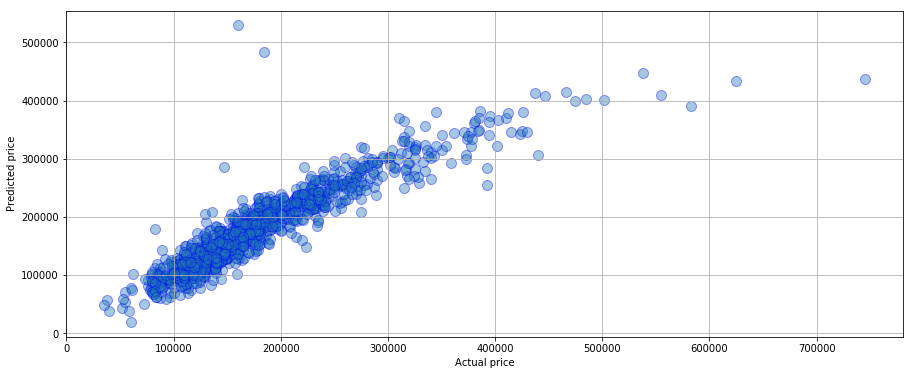

In [35]:
plt.figure(figsize=(15, 6))
plt.ylabel("Predicted price")
plt.xlabel("Actual price")
plt.grid(True)
plt.scatter(fasitBoligPris, lin_reg.predict(trening_set_utenPris), edgecolors='blue', alpha=0.4, s=100)
plt.show()

Det vi ser etter i en slik graf er hvordan linjen i grafen går. Ideelt sett vil vi ha en rettest mulig linje fra origo til diagonal hjørne av grafen. Vi ser på grafen at algoritmen har fått flesteparten av verdiene riktig, men har noen avvik her og der. En vanlig måleenhet for å feste feilaktigheten er MSE, eller mean squared error. Den tar altså feilmarginen opphøyd i andre for hvert hus, for så å regne ut snittet av dette resultatet på alle husene. Dette tilsier at jo lavere tall man får, jo bedre er modellen.

In [36]:
mse = (np.square(fasitBoligPris - lin_reg.predict(trening_set_utenPris)).mean())
print(mse)

924066142.2085485


Konklusjon: 980 millioner er et relativt høyt tall. Forhåpentligvis vil dette bli lavere i de andre modellene

_______________

### 5.2: Random Forest

_______________

In [37]:
from sklearn.ensemble import RandomForestRegressor

# Instantiate model with 1500 decision trees
rf = RandomForestRegressor(n_estimators = 1500, random_state = 42)

##### Type: Superviced, Ensemble learning, Klassifisering og regresjon

Baserer seg på en samling av flere 'Decition trees', som tilslutt slår seg sammen utgjør en 'forrest'. Denne samlingen får da en mer stabil og nøyktig beregning. Dette er en av de mest brukte algoritmene innenfor Machine Learning fordi den er enkel å forstå og fordi den kan bli brukt både til klassifiserings- og regresjonsoppgaver.

_______________

### 5.3: XGBoost

_______________

##### Type: Superviced, Boosting, regresjon/klassifisering

XGBoost står for exstreme gradient boosting og er optimalisert for boosted tree algoritmer. 
-  Boosting innenfor machine learning er en teknikk hvor man lager nye modeller for å korrigere feilmarginen fra den forrige modellen. Man legger til nye modeller sekvensielt, helt til resultatet stagnerer. 
-  Gradient boosting legger til nye modeller som prøver å forutse restveriden eller feilmarginen til den forrige modellen, for deretter å legge disse sammen til en endelig predikasjon. Den blir kalt dette fordi den bruker gradient descent-algoritmen for å minimere tapet, når man legger til en ny modell. 


_______________

## 6. Finjuster modellen og kombiner til en god løsning

_______________

I forhold maskinlæringsalgoritmer som forsøker å furutse boligpriser, er XGBoost ofte trukket fram som en model som kan gi et godt resultat. Jeg har derfor valgt denne i finjusteringdelen i håp om å få et enda mer presist resultat.  

In [38]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV
from xgboost import XGBRegressor as xgbr

In [39]:
xgb_reg = xgbr(n_jobs=-1)
xgb_reg.fit(trening_set_utenPris, fasitBoligPris)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=-1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [40]:
forutsePris = xgb_reg.predict(trening_set_utenPris)

_______________

#### MSE1:

In [42]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(fasitBoligPris, forutsePris)

10468.007738923374

_______________

In [43]:
forutsePris[0:10]

array([142981.39, 177760.28,  97871.68, 144316.38, 130094.09, 141128.6 ,
       180819.48, 114898.86, 177385.56, 235429.1 ], dtype=float32)

In [44]:
np.array(fasitBoligPris[0:10])

array([145000, 178000,  85000, 175000, 127000, 149900, 174000, 125500,
       175500, 225000], dtype=int64)

_______________

#### Justering av modellen


In [45]:
xgb_param_grid = {
        'min_child_weight': [1, 5, 10],
        'gamma': [0.0, 1.0, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.6, 0.8, 1.0],
        'max_depth': [5, 6, 7, 8, 10]
        }


xgb_param_grid_large = {
        'learning_rate': [0.1, 0.05, 0.2],
        'n_estimators': [50, 100, 500, 600],
        'min_child_weight': [1, 5, 10],
        'gamma': [0.0, 1.0, 1.5],
        'subsample': [0.6, 1.0],
        'colsample_bytree': [0.5, 0.6, 0.8],
        'max_depth': [3, 4, 5, 6, 7, 8, 9, 10],
        }

In [46]:
xgb_reg = xgbr(random_state=seed)

In [47]:
r_xgb_reg = RandomizedSearchCV(xgb_reg, xgb_param_grid, n_iter=50, verbose=1, n_jobs=-1, cv=3, random_state=seed)

In [48]:
%%time
r_xgb_reg.fit(trening_set_utenPris, fasitBoligPris)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.7s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   23.5s finished


Wall time: 24.4 s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'min_child_weight': [1, 5, 10], 'gamma': [0.0, 1.0, 1.5], 'subsample': [0.6, 1.0], 'colsample_bytree': [0.6, 0.8, 1.0], 'max_depth': [5, 6, 7, 8, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [49]:
r_xgb_reg.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.6, gamma=1.0, learning_rate=0.1,
       max_delta_step=0, max_depth=7, min_child_weight=10, missing=None,
       n_estimators=100, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [50]:
x_forutsePris = r_xgb_reg.predict(trening_set_utenPris)

_______________

#### MSE2

In [51]:
mean_absolute_error(fasitBoligPris, x_forutsePris)

7740.755601856807

_______________

Som vi ser har vi klart å forbedre resultatet en del bare i dette steget. 

Vi kjører så samme algoritmen på en større grid (xgb_param_grid_large), for å se om dette bedrer resultatet. 

In [52]:
xgb_reg2 = xgbr(random_state=seed)
r_xgb_reg2 = RandomizedSearchCV(xgb_reg2, xgb_param_grid_large, n_iter=50, verbose=1, n_jobs=-1, cv=3, random_state=42)

In [53]:
%%time
r_xgb_reg2.fit(trening_set_utenPris, fasitBoligPris)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   11.2s
[Parallel(n_jobs=-1)]: Done 150 out of 150 | elapsed:   49.7s finished


Wall time: 52.2 s


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=42,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1),
          fit_params=None, iid='warn', n_iter=50, n_jobs=-1,
          param_distributions={'learning_rate': [0.1, 0.05, 0.2], 'n_estimators': [50, 100, 500, 600], 'min_child_weight': [1, 5, 10], 'gamma': [0.0, 1.0, 1.5], 'subsample': [0.6, 1.0], 'colsample_bytree': [0.5, 0.6, 0.8], 'max_depth': [3, 4, 5, 6, 7, 8, 9, 10]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=1)

In [54]:
r_xgb_reg2.best_estimator_

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=0.5, gamma=1.0, learning_rate=0.1,
       max_delta_step=0, max_depth=5, min_child_weight=10, missing=None,
       n_estimators=600, n_jobs=1, nthread=None, objective='reg:linear',
       random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
       seed=None, silent=True, subsample=0.6)

In [55]:
x_forutsePris2 = r_xgb_reg2.predict(trening_set_utenPris)

_______________

#### MSE3:

In [56]:
mean_absolute_error(fasitBoligPris, x_forutsePris2)

2430.9003739030395

_______________

Som vi ser har vi nå klart å kvadrere MSE utifra utgangspunktet. Vi startet med 10468, deretter 7740 og nå 2430 som er en ganske stor forbedring

_______________

#### Kryssvalidering


Kryssvaliderings egenskapen vil dele opp treningssettet i 10 egne subset som blir kalt folds. 
Den trener og evaluerer modellen 10 ganger hvor den velger en ulik fold for hver evaluering, slik at treningen blir gjort på de resterende 9. 

Resultatet vi får ut vil være en array av 10 ulike evalueringspoengsummer. 


In [57]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean)
    print("Standard deviation:", scores.std())

In [61]:
from sklearn.model_selection import KFold, cross_val_score

xgb_scores = cross_val_score(xgb_reg, trening_set_utenPris, fasitBoligPris, scoring="neg_mean_squared_error", cv=10)
xgb_reg_scores = np.sqrt(-xgb_scores)
display_scores(xgb_reg_scores)

Scores: [17426.45192761 44898.47252597 19687.1974044  42135.10661357
 32495.0730554  33157.29003013 24732.21100425 21683.68728917
 24609.34446017 24570.07107753]
Mean: <built-in method mean of numpy.ndarray object at 0x00000297E52D5DF0>
Standard deviation: 8854.322384680228


In [66]:

from scipy import stats
confidence = 0.95
squared_errors = (x_forutsePris2 - fasitBoligPris) ** 2
mean = squared_errors.mean()
m = len(squared_errors)

np.sqrt(stats.t.interval(confidence, m - 1,
                        loc=np.mean(squared_errors),
                        scale=stats.sem(squared_errors)))

array([3066.33411772, 3579.66789745])

_______________

## 7. Presenter løsningen

_______________

I denne jupyter notebooken  har jeg laget en løsning (model) som skal kunne forutse en salgspris på en bolig, ved å bruke de ulike egenskapene vi har på huset. Modellen er absolutt ikke fulkommen, men gir et godt eksempel på hvor nøyaktig vi faktisk klarer å forutse en boligpris kun basert på et så lite datasett. Hadde vi hatt tilgang til et større datasett hadde nok resultatet av feks Linjær regresjons modellen blitt betydelig bedre. 

Selv om vi hadde finjustert på XGBoost-modellen og fått et bedre sluttresultat ville ikke dette hatt så mye å si dersom vi feks skulle brukt modellen på et norsk boligmarked. For å kunne bruke denne modellen i et annet land ville jeg forsøkt å hentet ut data lokalt fra landet vi skal forutse i.
Ville også som sagt forsøkt å fått tak i et større datasett til å trene modellene på. I en reel situasjon ville jeg også gjort modellen tyngre med kjøring av flere parametre, samt leid inn kraft fra en GPU-park til å kjøre kalkuleringene. 



_______________